In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import gzip, pickle
with gzip.open('mnist.pkl.gz','rb') as ff :
    u = pickle._Unpickler( ff )
    u.encoding = 'latin1'
    train, val, test = u.load()


print( train[0].shape, train[1].shape )
print( val[0].shape, val[1].shape )
print( test[0].shape, test[1].shape )

(50000, 784) (50000,)
(10000, 784) (10000,)
(10000, 784) (10000,)


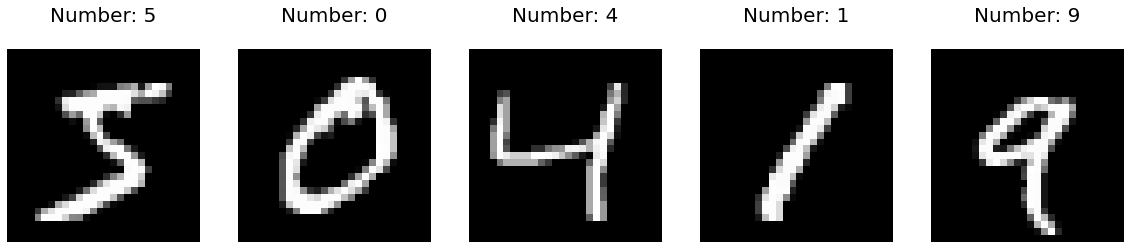

In [2]:
X = train[0]
y = train[1]
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(X[0:5], y[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Number: %i\n' % label, fontsize = 20)
    plt.axis('off')

# Gradiente descendente

In [3]:
#Utilizar menos datos porque sino al hacer las multiplicaciones para el Hessiano, no lo soporta la memoria
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.90, random_state = 0)

y_train = (y_train!=0)*1
x_train.shape, y_train.shape

((5000, 784), (5000,))

In [4]:
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

def h(X, y, theta, theta0):
    z = np.dot(X, theta)+theta0
    phi = sigmoid(z)
    return (y*np.log(phi)+(1-y)*np.log(1-phi))
    

def gradientDescent(X, y, theta, theta0, alpha):
    y = y.reshape([-1, 1]) 
    z = np.dot(X, theta)+theta0
    phi = sigmoid(z)
    gradient = np.dot(X.T, (y-phi))
    gradient_theta0 = sum(y-phi)
    
    theta -= alpha*gradient
    theta0 -= alpha*gradient_theta0
    
    return theta, theta0

In [5]:
#Inicializar las variables
theta = np.zeros([x_train.shape[1], 1])
theta0 = 3

theta_norm = []
for i in range(100):
    theta, theta0 = gradientDescent(x_train, y_train, theta, theta0, 0.0000001)
    theta_norm.append(np.linalg.norm(theta))
    print(np.linalg.norm(theta), theta0)

0.00031792652973581533 [3.00002749]
0.0006360069031539911 [3.000055]
0.0009542409959338668 [3.00008255]
0.0012726286834961948 [3.00011013]
0.00159116984100443 [3.00013773]
0.001909864343366015 [3.00016537]
0.0022287120652336643 [3.00019303]
0.0025477128810066523 [3.00022073]
0.0028668666648320957 [3.00024845]
0.00318617329060624 [3.0002762]
0.003505632631975746 [3.00030398]
0.003825244562338971 [3.0003318]
0.00414500895484726 [3.00035964]
0.004464925682406222 [3.00038751]
0.004784994617677023 [3.00041541]
0.0051052156330776656 [3.00044334]
0.005425588600784273 [3.0004713]
0.005746113392732377 [3.00049929]
0.006066789880618195 [3.0005273]
0.006387617935899921 [3.00055535]
0.006708597429799004 [3.00058343]
0.00702972823330143 [3.00061153]
0.007351010217159008 [3.00063967]
0.00767244325189065 [3.00066783]
0.00799402720778365 [3.00069602]
0.008315761954894972 [3.00072425]
0.008637647363052526 [3.0007525]
0.008959683301856446 [3.00078078]
0.009281869640680373 [3.00080909]
0.0096042062486727

In [6]:
x_test = test[0][:5000, :]
y_test = test[1][:5000]
x_test.shape, y_test.shape

((5000, 784), (5000,))

In [7]:
import pandas as pd

#Error gradiente descendente
error = np.zeros(len(y))
z = np.dot(x_test, theta)+theta0
phi = sigmoid(z)
y_test = y_test.reshape([-1,1])
error = abs(phi-y_test)
df = pd.DataFrame(error)
df.describe()

#error.mean()

,0
count,5000.000000
mean,3.691018
std,2.660056
min,0.039870
25%,1.041809
50%,3.044717
75%,6.043642
max,8.045831


# Newton Modificado

In [8]:
#newton-rhapson
def newton(X, y, theta, theta0):
    z = np.dot(X, theta)+theta0
    phi = sigmoid(z)
    W = np.diag(phi*(1-phi))
    hessian = X.T.dot(W).dot(X)
    norm_hessian = np.linalg.norm(hessian)
    
    add = np.zeros([hessian.shape[0], hessian.shape[1]])
    for i in range(hessian.shape[0]):
        add[i][i] = norm_hessian
    
    hessian += add 
    gradient = np.dot(X.T, (y-phi))      
    step = np.dot(np.linalg.inv(hessian), gradient)        
    theta += step    
    
    hessian_theta0 = W.sum()
    grad_theta0 = sum(y-phi)
    
    step_theta0 = (1/hessian_theta0)*grad_theta0
    theta0 += step_theta0
    
    return theta, theta0

In [9]:
theta = np.zeros([x_train.shape[1]])
theta0 = 0.0

theta_norm_newton = []
for i in range(20):
    theta, theta0 = newton(x_train, y_train, theta, theta0)
    print(np.linalg.norm(theta), theta0)
    theta_norm_newton.append(np.linalg.norm(theta))

0.12574339616620406 1.5904
0.20012767501575912 1.4894164869327093
0.27740798131896394 1.6776697905154776
0.35241925146093245 1.7148992957160865
0.4167166050637232 1.8140377838658974
0.4759455465634363 1.8783141716548062
0.5299819221567356 1.9521986012575223
0.5803834542063285 2.0165245834296837
0.6276164666252574 2.080143223069357
0.6722676203035284 2.139602017446603
0.7146726083854322 2.1967438919971025
0.7551309685168797 2.2510692323462473
0.7938619220997573 2.3030580427747807
0.8310505846419293 2.3527337703213145
0.8668471750252735 2.4002935794071156
0.9013799004263231 2.445837599415065
0.9347581219154406 2.4894907692091692
0.9670771190599904 2.5313520120690765
0.998420444238419 2.571518767535688
1.028862155219938 2.610077892471046


In [ ]:
df_n = pd.DataFrame(theta_norm_newton)
df_n.describe()

In [12]:
#Error newton
error = np.zeros(len(y))
z = np.dot(x_test, theta)+theta0
phi = sigmoid(z)
y_test = y_test.reshape([-1,1])
error = abs(phi-y_test)

df_newton = pd.DataFrame(error)
df_newton.mean().describe()
#error.mean()

count    5000.000000
mean        3.729799
std         0.158507
min         3.656641
25%         3.663343
50%         3.671160
75%         3.699118
max         4.449659
dtype: float64